In [1]:
import pandas as pd

# Load the dataset without headers
file_path = r"C:\Users\indum\Downloads\twitter_training.csv"
data = pd.read_csv(file_path, header=None)

# Assign column names
data.columns = ['ID', 'Game', 'Sentiment', 'Tweet']

# Display the first few rows to verify
print(data.head())


     ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [3]:
import re

# Preprocess tweets
def clean_tweet(tweet):
    if not isinstance(tweet, str):
        tweet = str(tweet)
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\S+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\S+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'\s+', ' ', tweet)     # Remove extra whitespace
    tweet = tweet.strip()                  # Remove leading/trailing spaces
    return tweet

data['Cleaned_Tweet'] = data['Tweet'].apply(clean_tweet)


In [4]:
from textblob import TextBlob

# Perform sentiment analysis
def get_textblob_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['TextBlob_Sentiment'] = data['Cleaned_Tweet'].apply(get_textblob_sentiment)


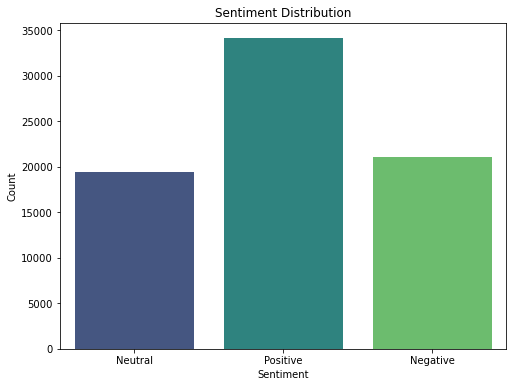

ValueError: Only supported for TrueType fonts

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='TextBlob_Sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word Cloud
all_words = ' '.join([text for text in data['Cleaned_Tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()
